In [92]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [93]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [94]:
df = pd.read_csv("../Python/Output/FFT_4_7_Spec.txt", sep='\t')
df.head()

SinSource NoiseType  Noise Signal  Order  Freq  Index  Imag  Wave  Spec  \
0  IndexSin  Gaussian    0.0    Sin      4     4      0     0   0.0   0.0   
1  IndexSin  Gaussian    0.0    Sin      4     4      0     1   0.0   0.0   
2  IndexSin  Gaussian    0.0    Sin      4     4      1     0   1.0   0.0   
3  IndexSin  Gaussian    0.0    Sin      4     4      1     1   0.0   0.0   
4  IndexSin  Gaussian    0.0    Sin      4     4      2     0   0.0   0.0   

   Forward Error  Forward Uncertainty  Reverse Error  Reverse Uncertainty  \
0            0.0         3.625973e-16            0.0         0.000000e+00   
1            0.0         0.000000e+00            0.0         0.000000e+00   
2            0.0         2.563950e-16            0.0         1.281975e-16   
3            0.0         2.563950e-16            0.0         0.000000e+00   
4            0.0         2.563950e-16            0.0         0.000000e+00   

   Roundtrip Error  Roundtrip Uncertainty  
0              0.0           6.409876e-17  
1              0.0           6.409876e-17  
2              0.0           1.468687e-16  
3              0.0           5.551115e-17  
4              0.0           6.409876e-17

In [95]:
for test in ('Forward', 'Reverse', 'Roundtrip'):
    df[f'{test} Normalized Error'] = df[f'{test} Error'] / df[f'{test} Uncertainty']
df.head()

SinSource NoiseType  Noise Signal  Order  Freq  Index  Imag  Wave  Spec  \
0  IndexSin  Gaussian    0.0    Sin      4     4      0     0   0.0   0.0   
1  IndexSin  Gaussian    0.0    Sin      4     4      0     1   0.0   0.0   
2  IndexSin  Gaussian    0.0    Sin      4     4      1     0   1.0   0.0   
3  IndexSin  Gaussian    0.0    Sin      4     4      1     1   0.0   0.0   
4  IndexSin  Gaussian    0.0    Sin      4     4      2     0   0.0   0.0   

   Forward Error  Forward Uncertainty  Reverse Error  Reverse Uncertainty  \
0            0.0         3.625973e-16            0.0         0.000000e+00   
1            0.0         0.000000e+00            0.0         0.000000e+00   
2            0.0         2.563950e-16            0.0         1.281975e-16   
3            0.0         2.563950e-16            0.0         0.000000e+00   
4            0.0         2.563950e-16            0.0         0.000000e+00   

   Roundtrip Error  Roundtrip Uncertainty  Forward Normalized Error  \
0              0.0           6.409876e-17                       0.0   
1              0.0           6.409876e-17                       NaN   
2              0.0           1.468687e-16                       0.0   
3              0.0           5.551115e-17                       0.0   
4              0.0           6.409876e-17                       0.0   

   Reverse Normalized Error  Roundtrip Normalized Error  
0                       NaN                         0.0  
1                       NaN                         0.0  
2                       0.0                         0.0  
3                       NaN                         0.0  
4                       NaN                         0.0

In [96]:
def FilterNormalizedErrorStat(sinSource='IndexSin', noiseType='Gaussian', noise=0, 
                                 signal='Sin', order=4, freq=1, test='Forward', imag=0):
    return df[(df['SinSource']==sinSource) & (df['NoiseType']==noiseType) & (df['Noise']==noise) & 
              (df['Signal']==signal) & (df['Order']==order) & (df['Freq']==freq) & (df['Imag']==imag)]\
           [[f'{test} Error', f'{test} Uncertainty', f'{test} Normalized Error']]

In [97]:
FilterNormalizedErrorStat(imag=0).head()

Forward Error  Forward Uncertainty  Forward Normalized Error
32            0.0         1.922963e-16                       0.0
34            0.0         2.698781e-16                       0.0
36            0.0         1.013490e-16                       0.0
38            0.0         2.313808e-16                       0.0
40            0.0         1.281975e-16                       0.0

In [98]:
def PrintNormalizedErrorStat(noiseType='Gaussian', noise=0, signal='Sin', order=6, freq=3):
    with pd.option_context('mode.use_inf_as_na', True):
        for test in ('Forward', 'Reverse', 'Roundtrip'):
            for sinSource in ('IndexSin', 'LibSin'):
                for imag in (0,1):
                    dfStat = FilterNormalizedErrorStat(sinSource, noiseType, noise, 
                                 signal, order, freq, test, imag)[f'{test} Normalized Error'].dropna()
                    idxMax = dfStat.idxmax()
                    maxIndex =  df.iloc[idxMax]['Index']
                    maxError =  df.iloc[idxMax][f'{test} Error']
                    maxUncertainty =  df.iloc[idxMax][f'{test} Uncertainty']
                    maxError =  df.iloc[idxMax][f'{test} Error']
                    print(f'{test}, {sinSource}, {imag} mean={dfStat.mean()}, std={dfStat.std()}, max={dfStat.max()} maxIndex={maxIndex}, maxError={maxError}, maxUncertainty={maxUncertainty.max()}')
                    

In [99]:
PrintNormalizedErrorStat()

Forward, IndexSin, 0 mean=-0.0029487967459472363, std=0.36583532315329864, max=1.2261026969226145 maxIndex=3, maxError=1.3322676295501878e-15, maxUncertainty=1.0865873086276018e-15
Forward, IndexSin, 1 mean=-7.162729191130042e-18, std=0.9291361897239152, max=2.431402266060346 maxIndex=57, maxError=1.143607563916758e-15, maxUncertainty=4.703489751080023e-16
Forward, LibSin, 0 mean=0.4368440999759, std=5.597663122957839, max=12.340676325451069 maxIndex=12, maxError=4.297867351423592e-15, maxUncertainty=3.4826837995578813e-16
Forward, LibSin, 1 mean=0.026487444402032163, std=7.048555237022876, max=17.77584593036088 maxIndex=40, maxError=5.497725186711317e-15, maxUncertainty=3.092806501726753e-16
Reverse, IndexSin, 0 mean=0.0, std=0.5443075073599494, max=1.2727707351716333 maxIndex=2, maxError=1.1102230246251563e-16, maxUncertainty=8.722883029483253e-17
Reverse, IndexSin, 1 mean=1.3877787807814458e-18, std=0.5242453665703024, max=0.8376458433060006 maxIndex=5, maxError=5.551115123125783e-1

In [100]:
def PlotSpectra( sinSource, order, signal, freq, test, noiseType='Gaussian', noise=0,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(f'{signal}(2$\pi$ {freq}/2^{order}) {test} using {sinSource} noise={noise}')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Absolute Value Error')
    #ax.set_yscale('log')
    #ax.set_ylim(ylim)
    plt.grid(True)
    
    dfPlot = df[(df['SinSource']==sinSource) & (df['NoiseType']==noiseType) & (df['Noise']==noise) &
                (df['Order']==order) & (df['Signal']==signal) & (df['Freq']==freq)]\
                .sort_values('Index')
    dfReal = dfPlot[dfPlot['Imag'] == 0]
    dfImag = dfPlot[dfPlot['Imag'] == 1]
    ax.plot(dfReal['Index'], dfReal[f'{test} Uncertainty'], 'k-', label=f'Uncertainty Real')
    ax.plot(dfImag['Index'], dfImag[f'{test} Uncertainty'], c='gray', ls='-', label=f'Uncertainty Imag')
    ax.plot(dfReal['Index'], np.abs(dfReal[f'{test} Error']), 'k--', label=f'Value Error Real')
    ax.plot(dfImag['Index'], np.abs(dfImag[f'{test} Error']), c='gray', ls=':', label=f'Value Error Imag')
    
    ax.legend(bbox_to_anchor=(1.0, 1.0))


In [101]:
def PlotAllForFreq(order, freq, singal):
    for test in ('Forward', 'Reverse', 'Roundtrip'):
        for sinSource in ('IndexSin', 'LibSin'):
            PlotSpectra(sinSource, order, signal, freq, test)

In [102]:
def PlotAllForTest(sinSource, order, signal, test):
    for freq in range(1, 8):
        PlotSpectra(sinSource, order, signal, freq, test)

In [103]:
ORDER=6

# For IndexSin, freq and (1 << (order-1)) - freq are  almost identical only for oder=4

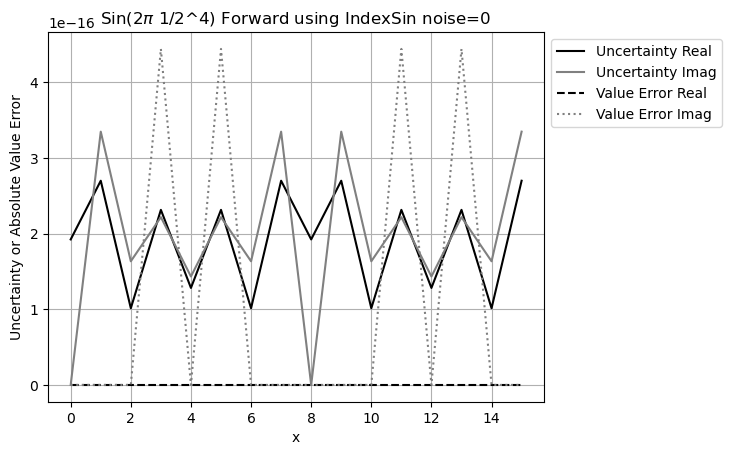

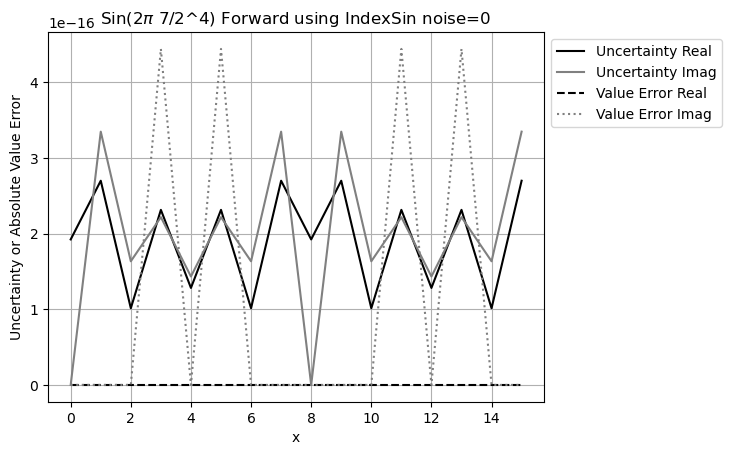

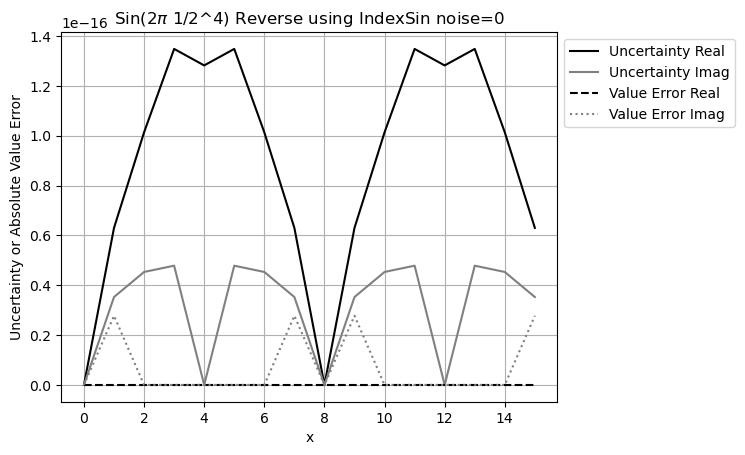

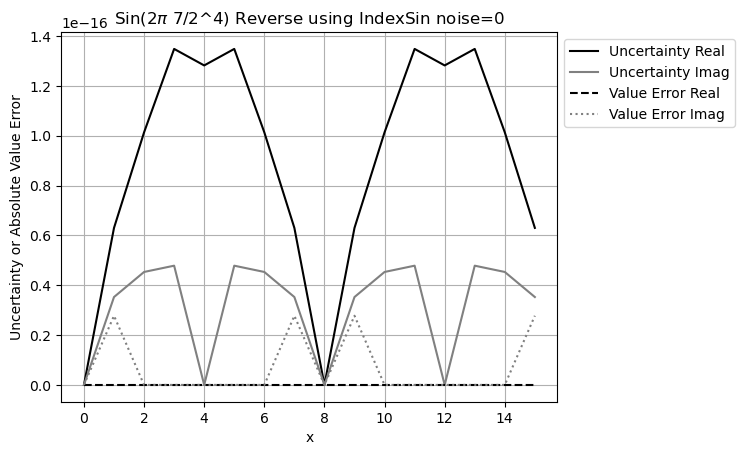

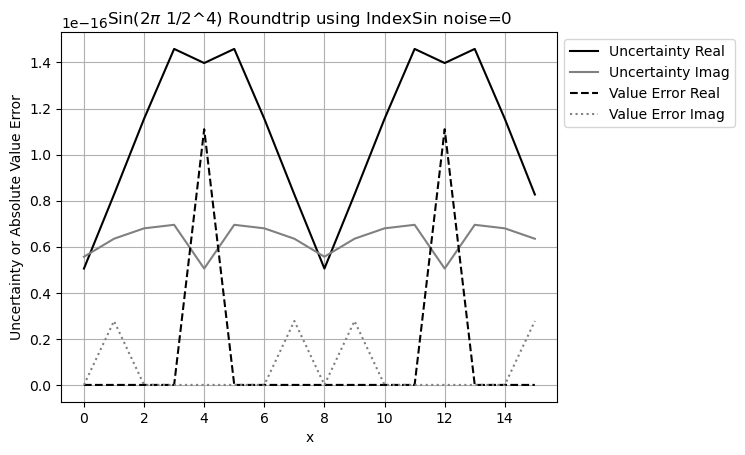

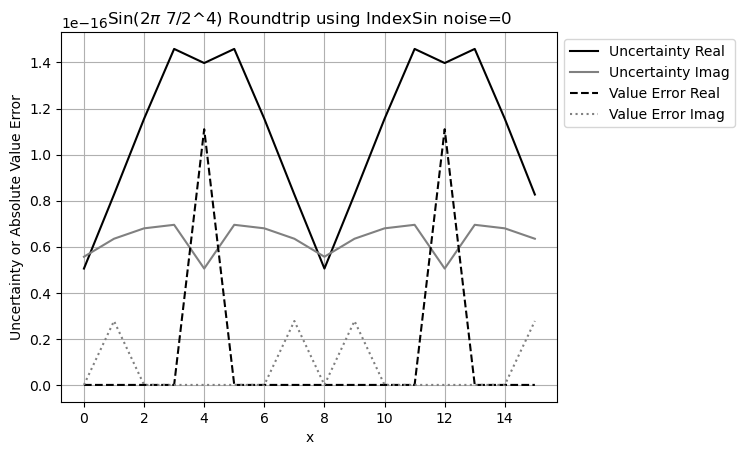

In [104]:
PlotSpectra('IndexSin', 4, 'Sin', 1, 'Forward')
PlotSpectra('IndexSin', 4, 'Sin', 7, 'Forward')
PlotSpectra('IndexSin', 4, 'Sin', 1, 'Reverse')
PlotSpectra('IndexSin', 4, 'Sin', 7, 'Reverse')
PlotSpectra('IndexSin', 4, 'Sin', 1, 'Roundtrip')
PlotSpectra('IndexSin', 4, 'Sin', 7, 'Roundtrip')

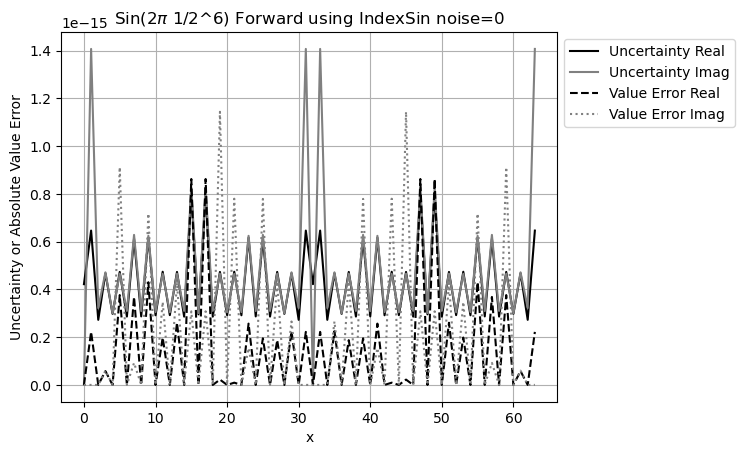

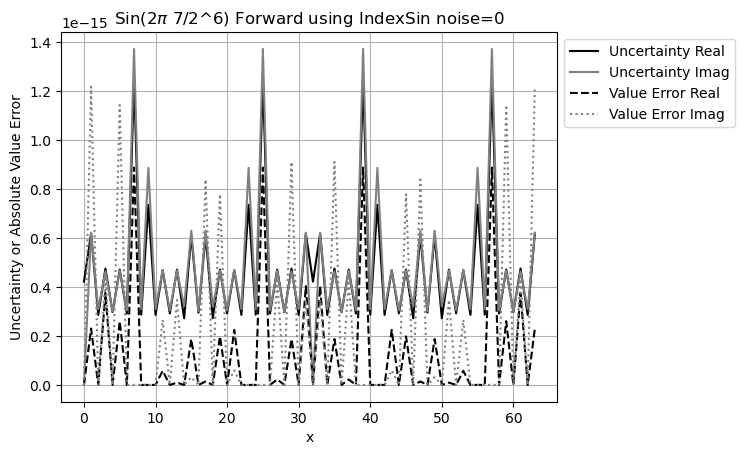

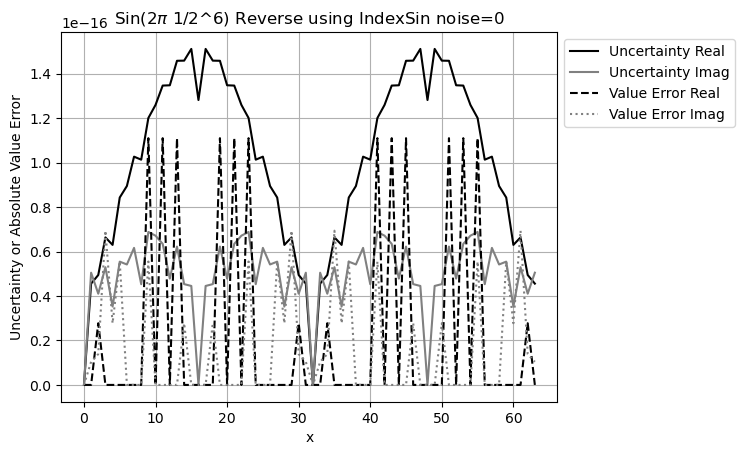

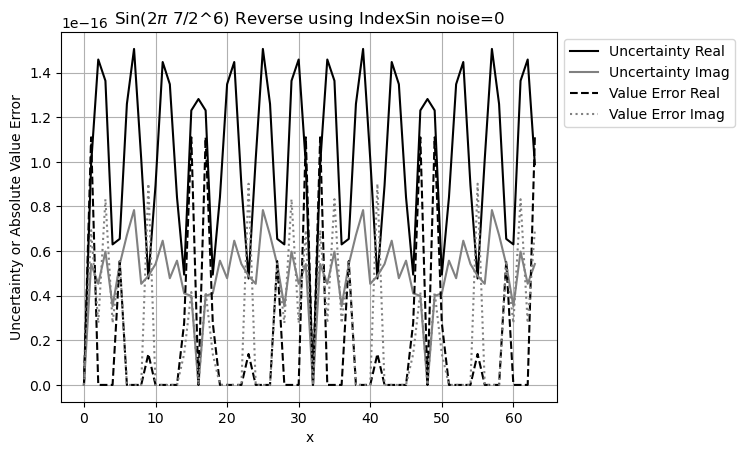

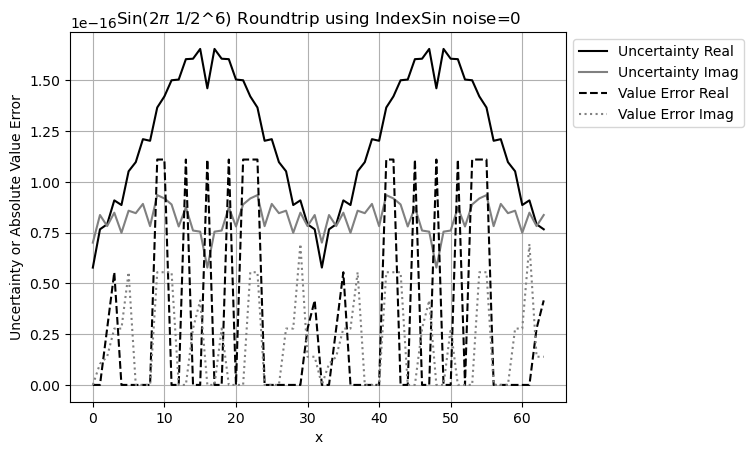

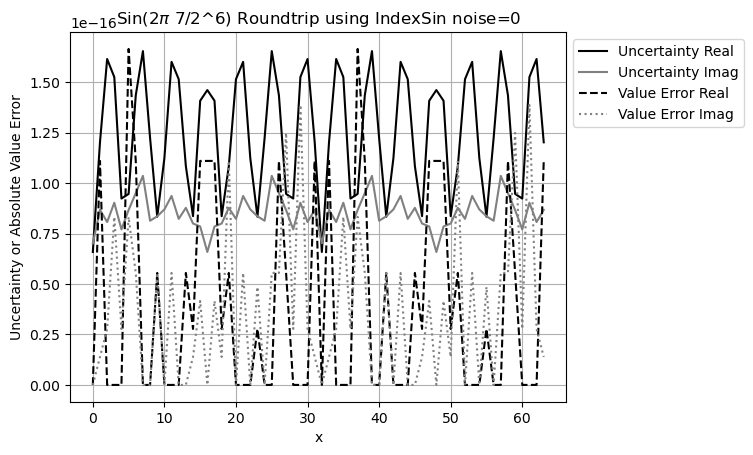

In [105]:
PlotSpectra('IndexSin', ORDER, 'Sin', 1, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 7, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 1, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 7, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 1, 'Roundtrip')
PlotSpectra('IndexSin', ORDER, 'Sin', 7, 'Roundtrip')

# Compare Sin and Cos: The forward is rea-imag flipped. The reverse is identical. The roundtrip is shifted

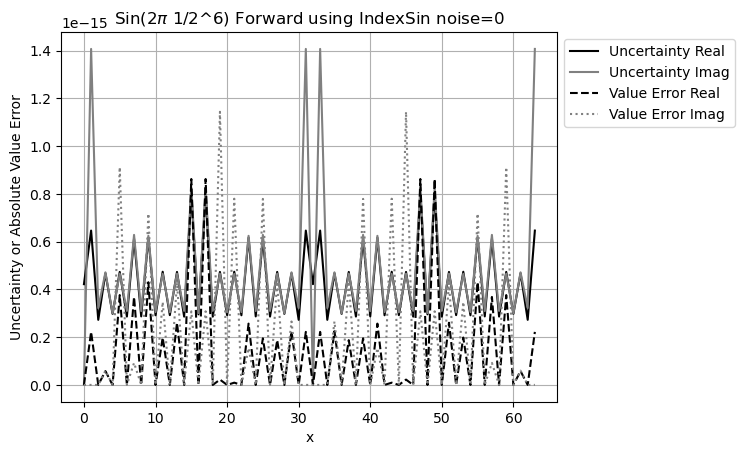

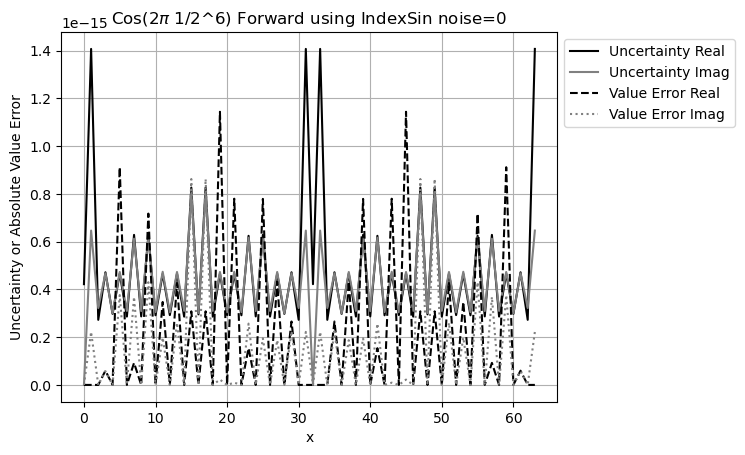

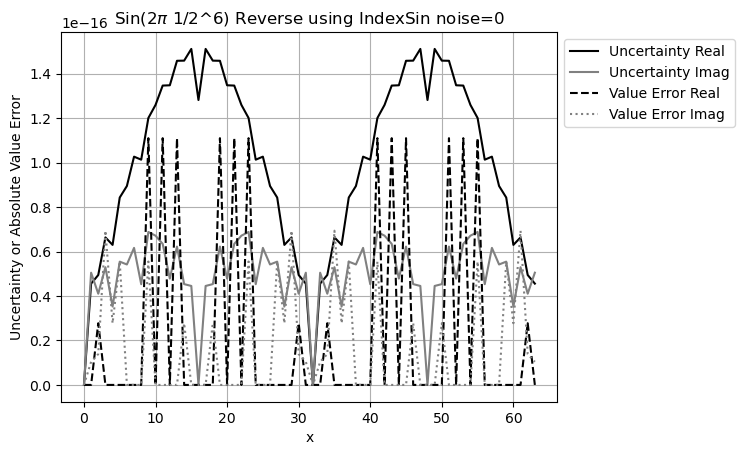

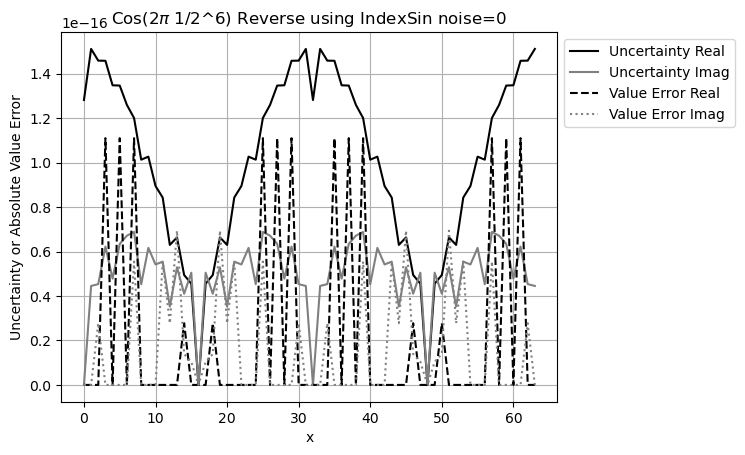

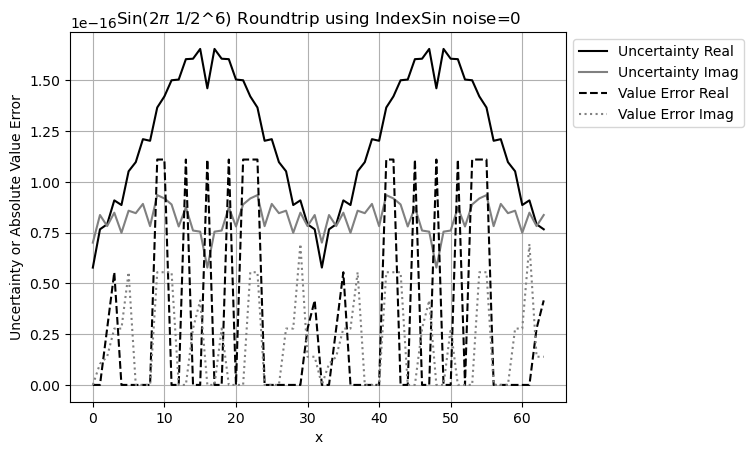

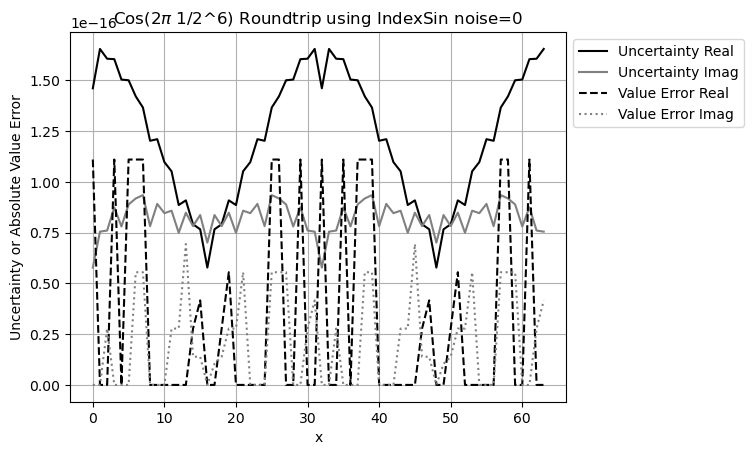

In [106]:
PlotSpectra('IndexSin', ORDER, 'Sin', 1, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Cos', 1, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 1, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Cos', 1, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 1, 'Roundtrip')
PlotSpectra('IndexSin', ORDER, 'Cos', 1, 'Roundtrip')

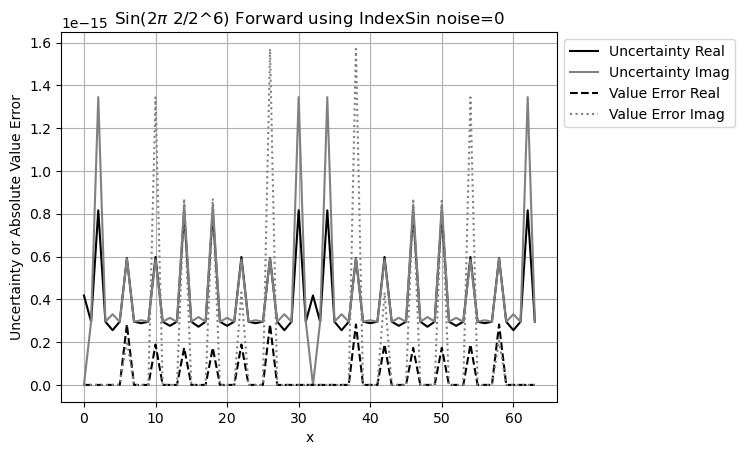

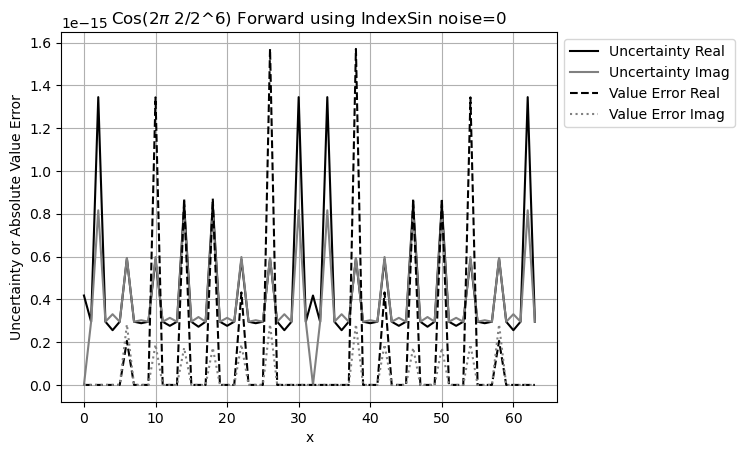

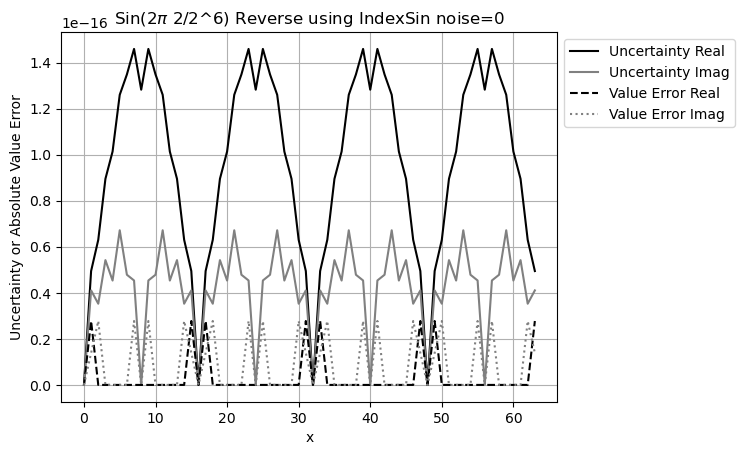

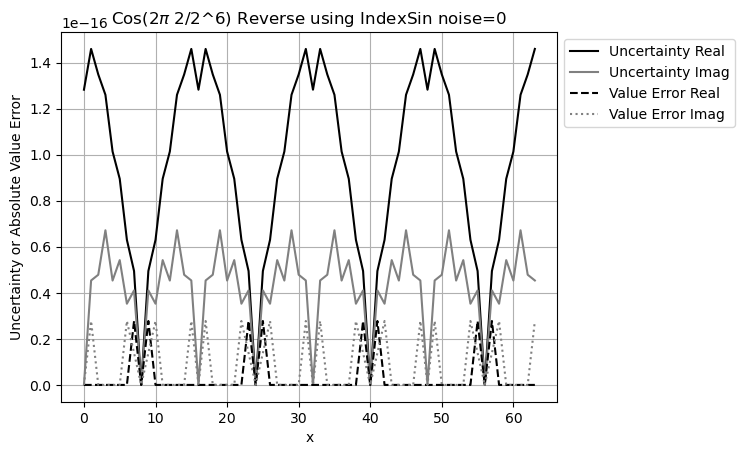

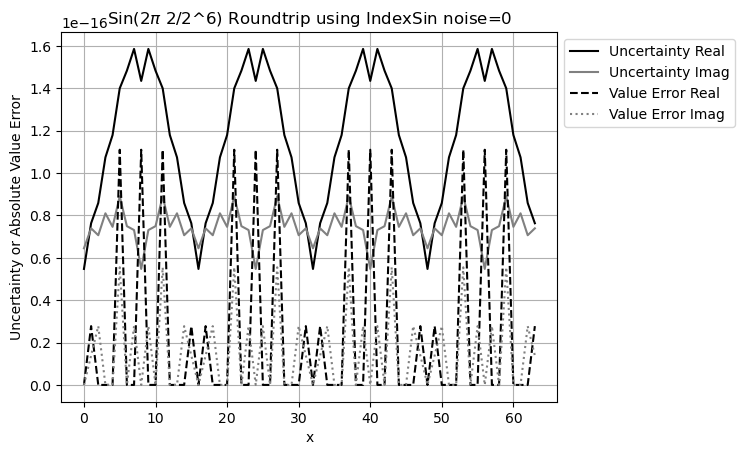

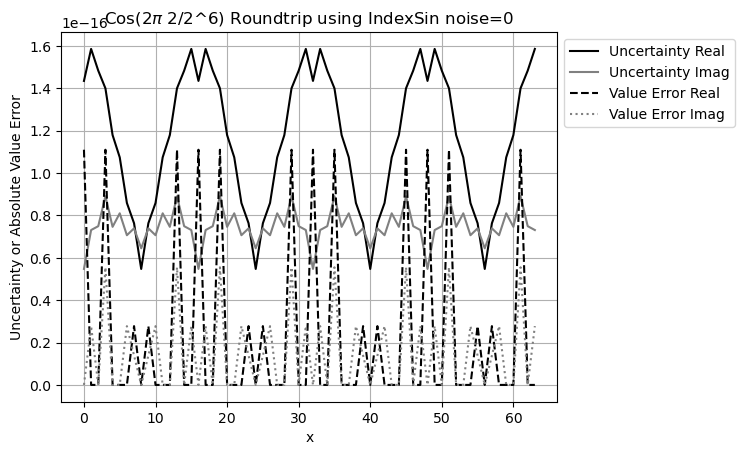

In [107]:
PlotSpectra('IndexSin', ORDER, 'Sin', 2, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Cos', 2, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 2, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Cos', 2, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 2, 'Roundtrip')
PlotSpectra('IndexSin', ORDER, 'Cos', 2, 'Roundtrip')

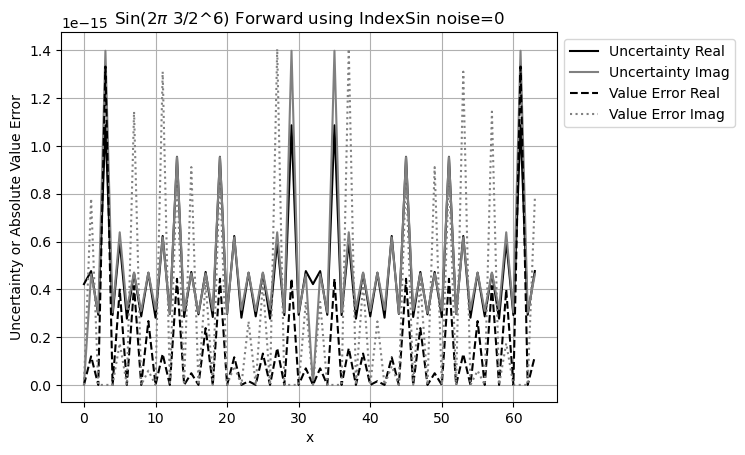

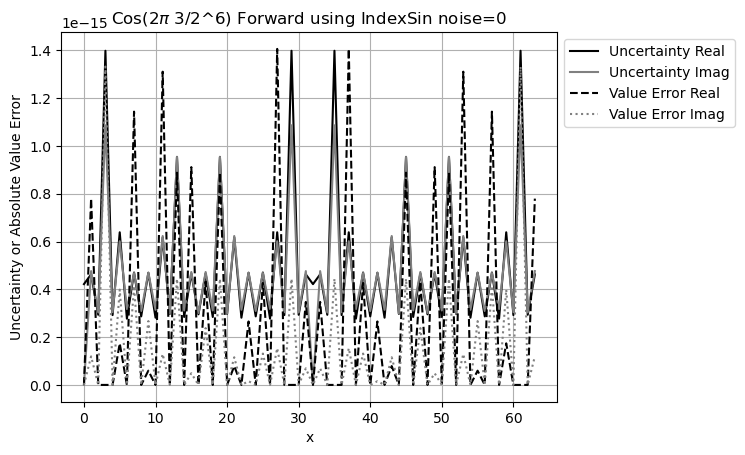

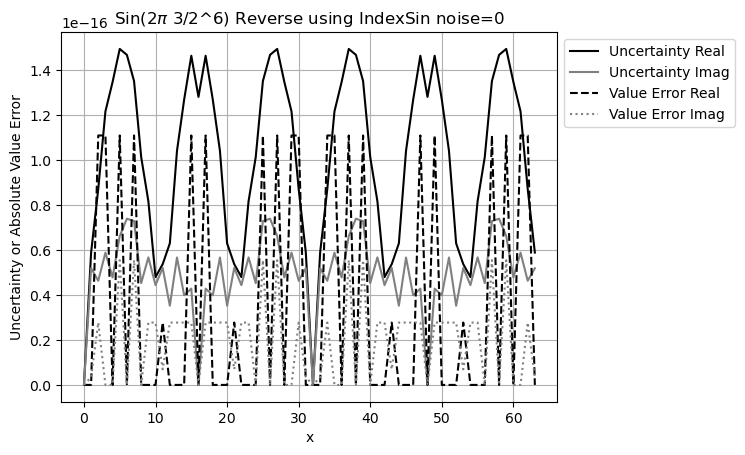

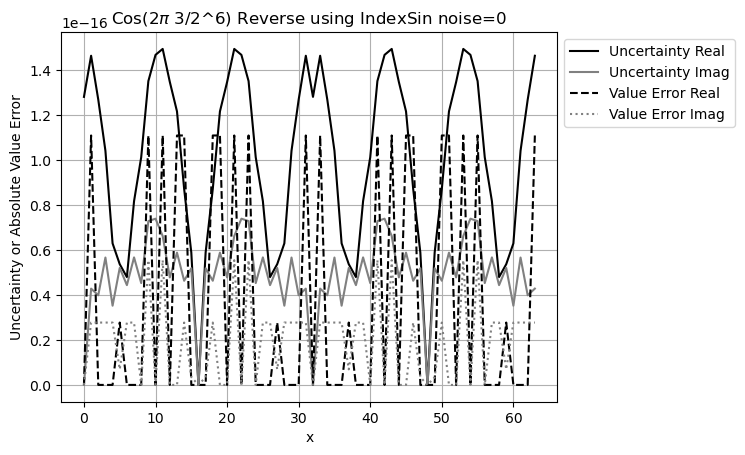

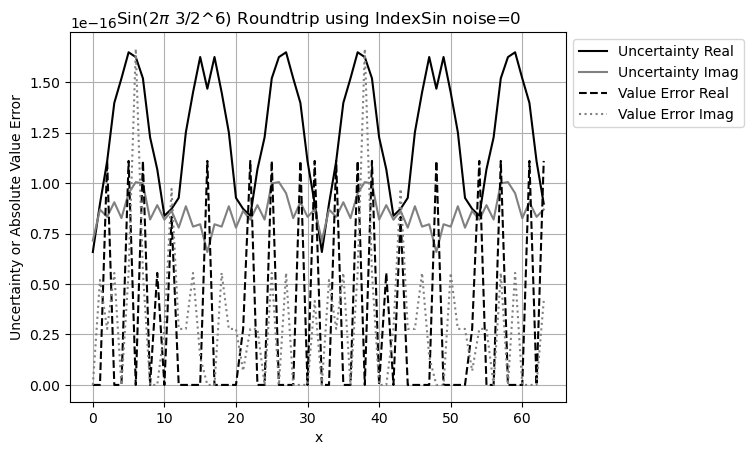

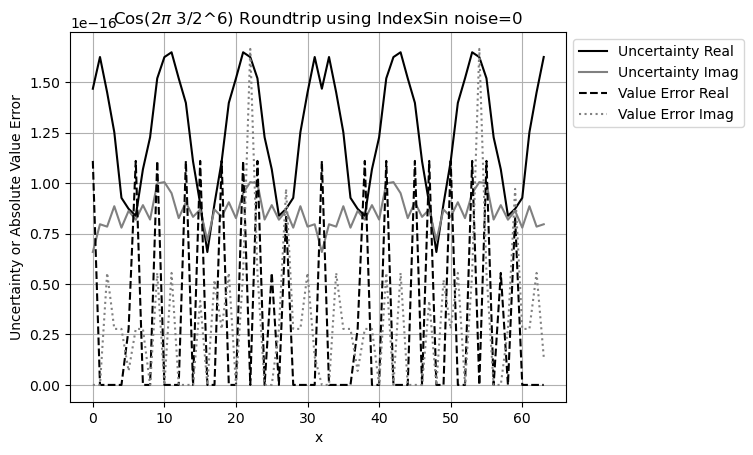

In [108]:
PlotSpectra('IndexSin', ORDER, 'Sin', 3, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Cos', 3, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 3, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Cos', 3, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 3, 'Roundtrip')
PlotSpectra('IndexSin', ORDER, 'Cos', 3, 'Roundtrip')

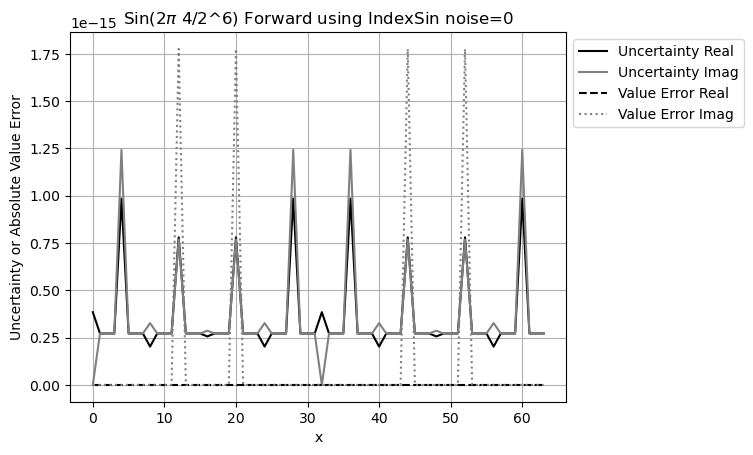

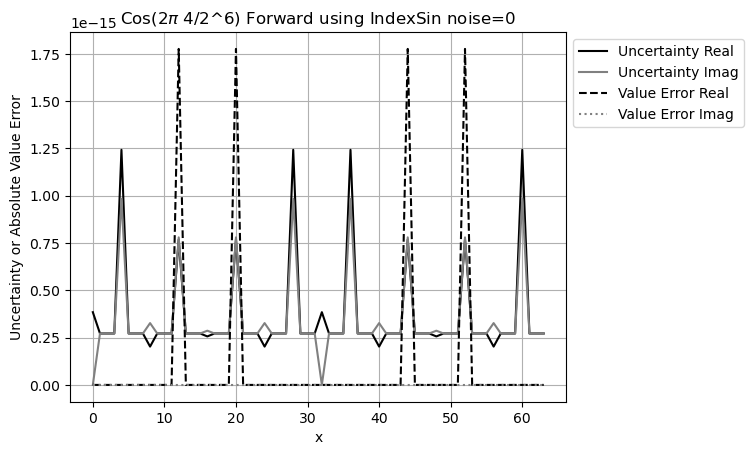

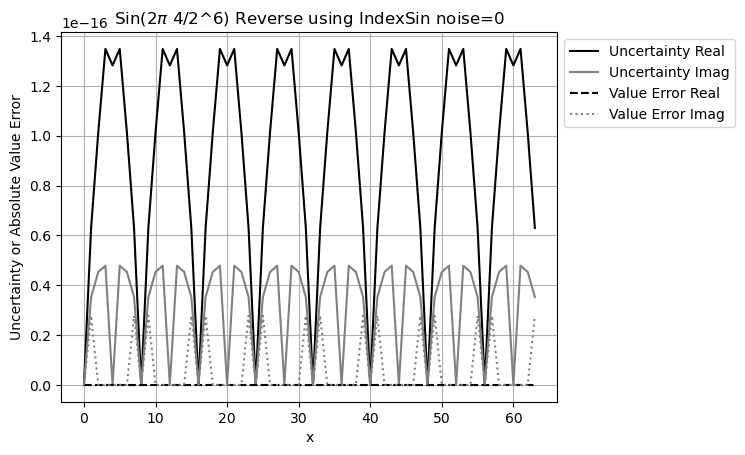

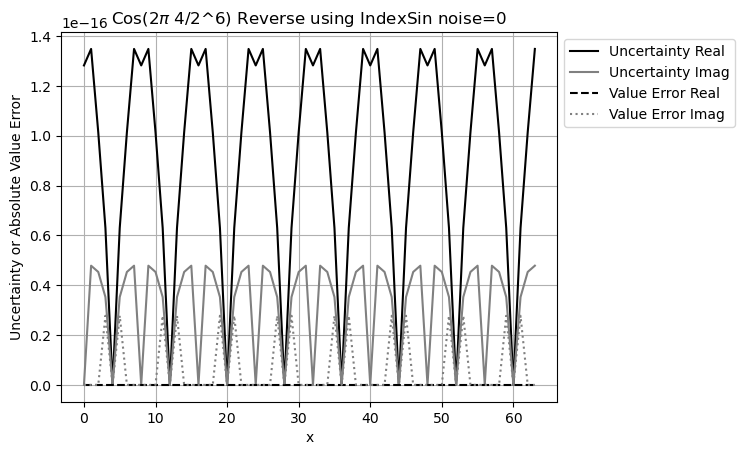

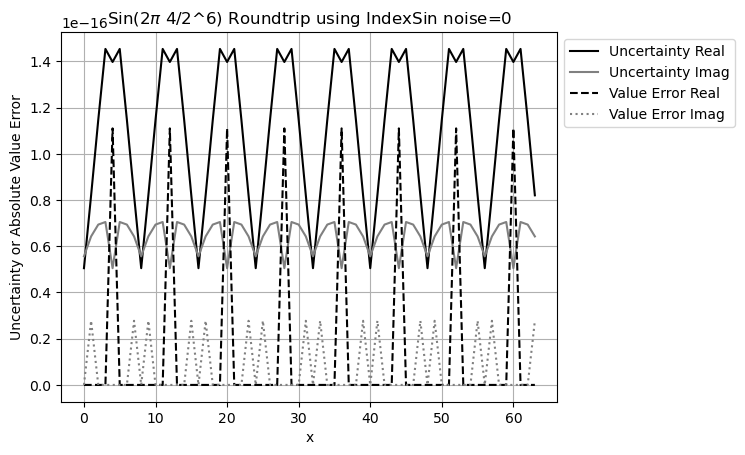

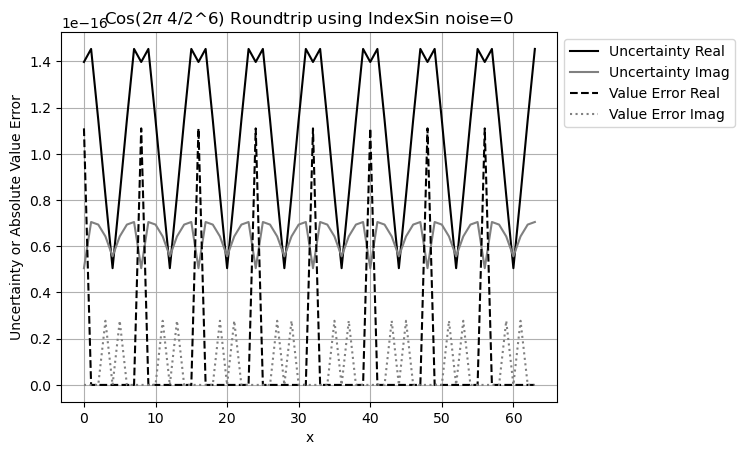

In [109]:
PlotSpectra('IndexSin', ORDER, 'Sin', 4, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Cos', 4, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 4, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Cos', 4, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 4, 'Roundtrip')
PlotSpectra('IndexSin', ORDER, 'Cos', 4, 'Roundtrip')

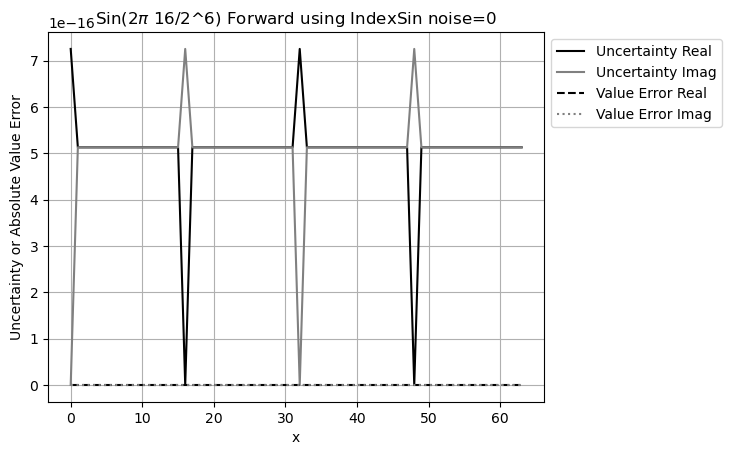

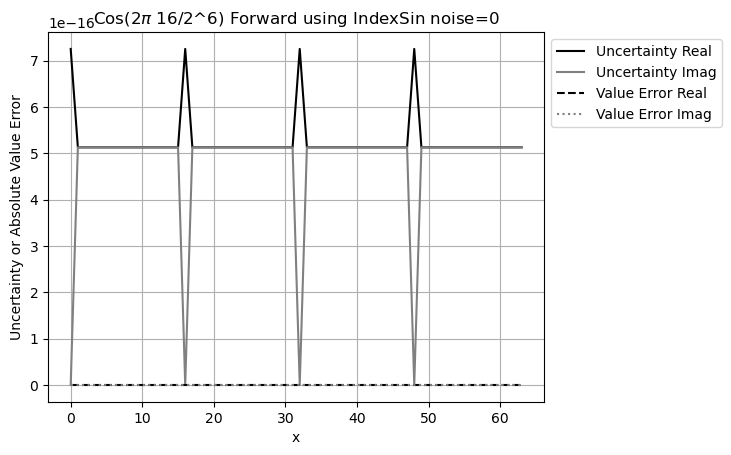

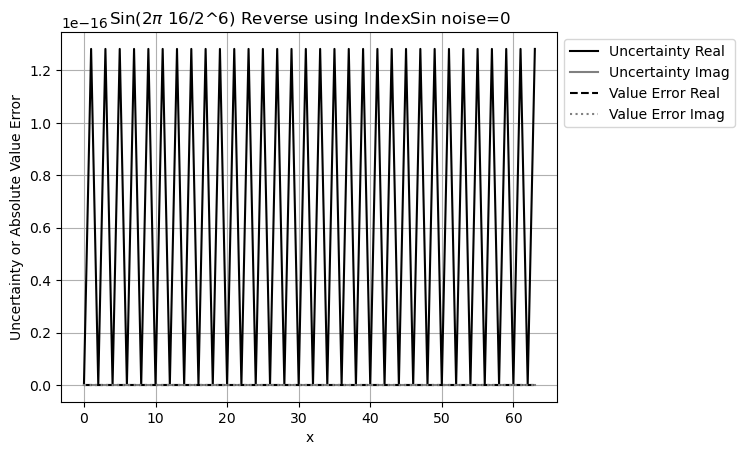

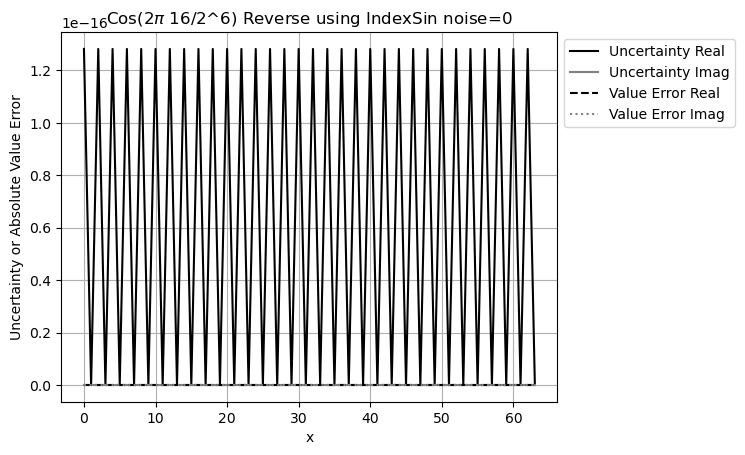

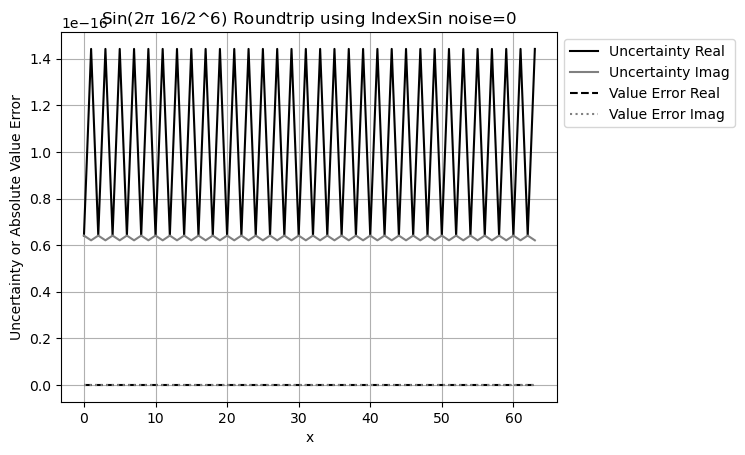

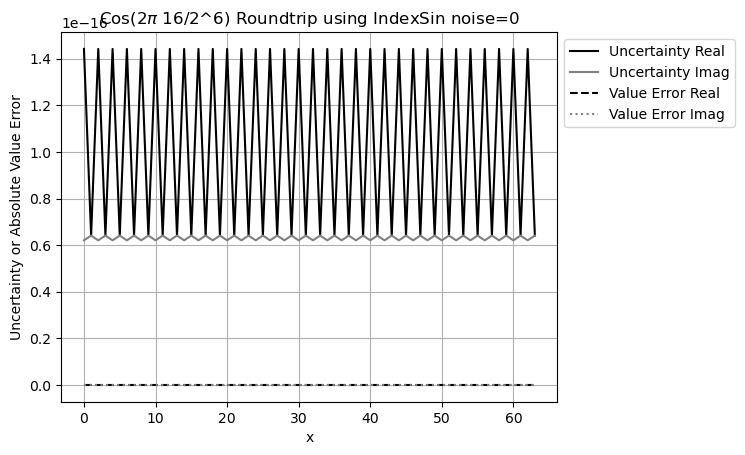

In [110]:
PlotSpectra('IndexSin', ORDER, 'Sin', 16, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Cos', 16, 'Forward')
PlotSpectra('IndexSin', ORDER, 'Sin', 16, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Cos', 16, 'Reverse')
PlotSpectra('IndexSin', ORDER, 'Sin', 16, 'Roundtrip')
PlotSpectra('IndexSin', ORDER, 'Cos', 16, 'Roundtrip')

# Compare different Order Same frequency

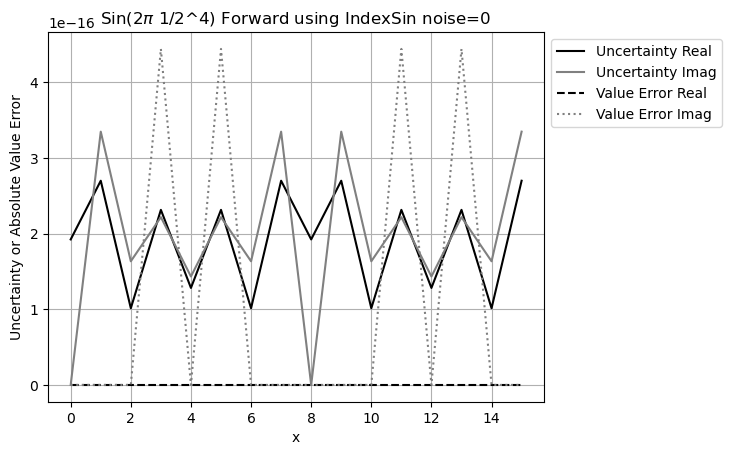

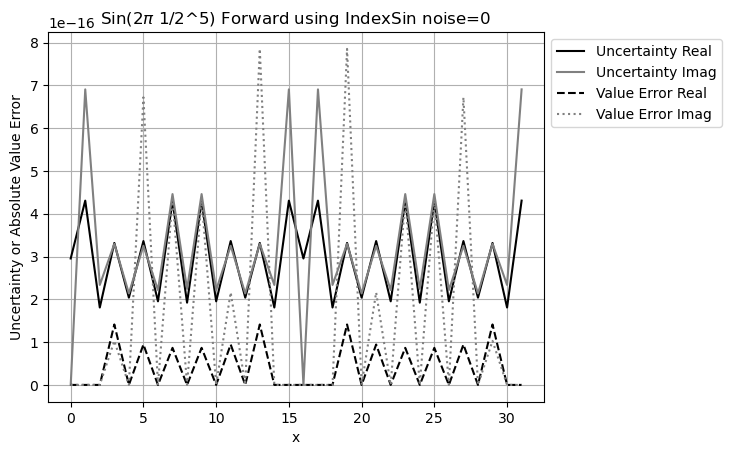

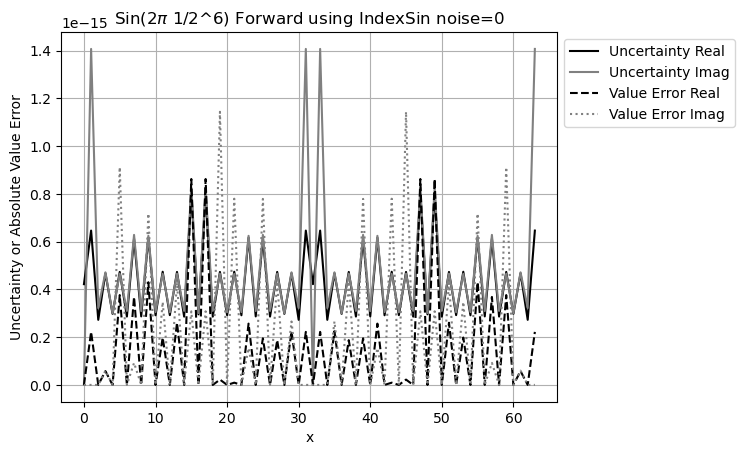

In [111]:
PlotSpectra('IndexSin', 4, 'Sin', 1, 'Forward')
PlotSpectra('IndexSin', 5, 'Sin', 1, 'Forward')
PlotSpectra('IndexSin', 6, 'Sin', 1, 'Forward')

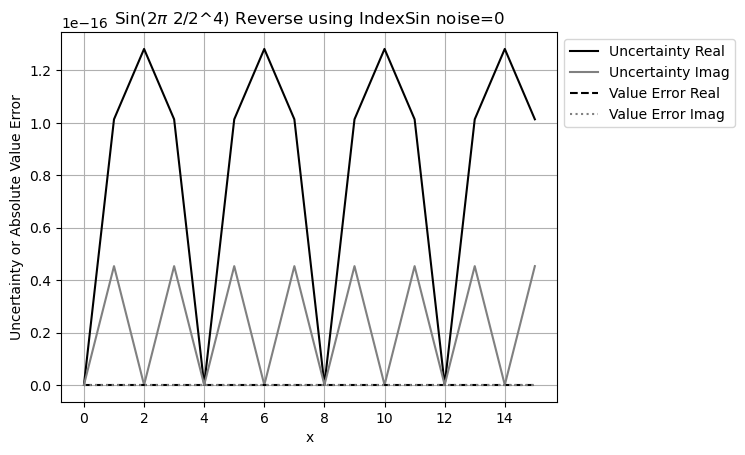

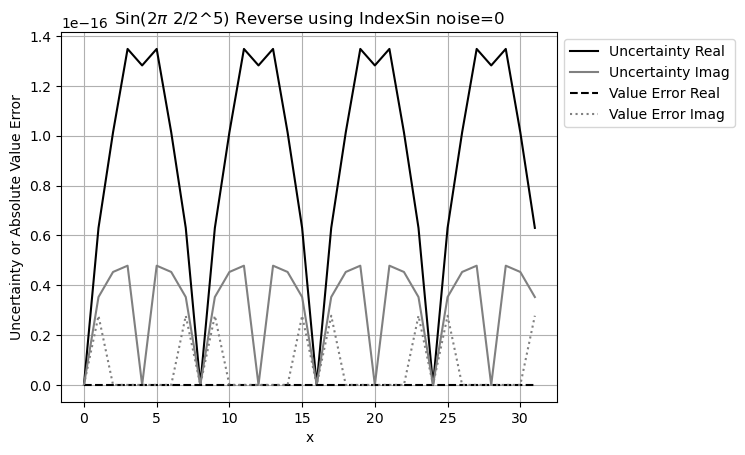

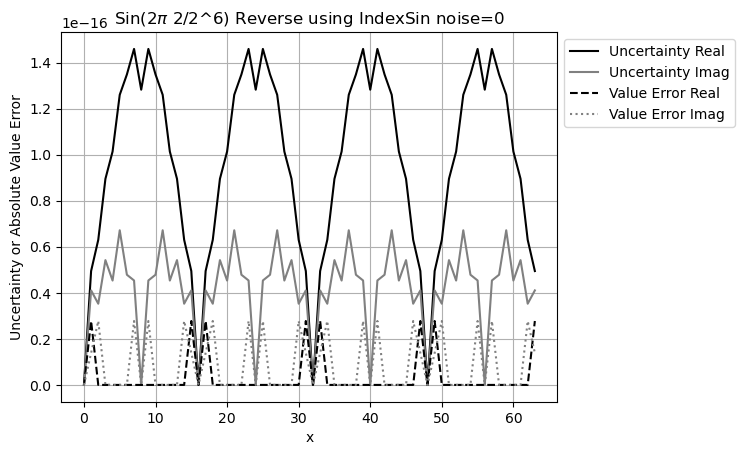

In [112]:
PlotSpectra('IndexSin', 4, 'Sin', 2, 'Reverse')
PlotSpectra('IndexSin', 5, 'Sin', 2, 'Reverse')
PlotSpectra('IndexSin', 6, 'Sin', 2, 'Reverse')

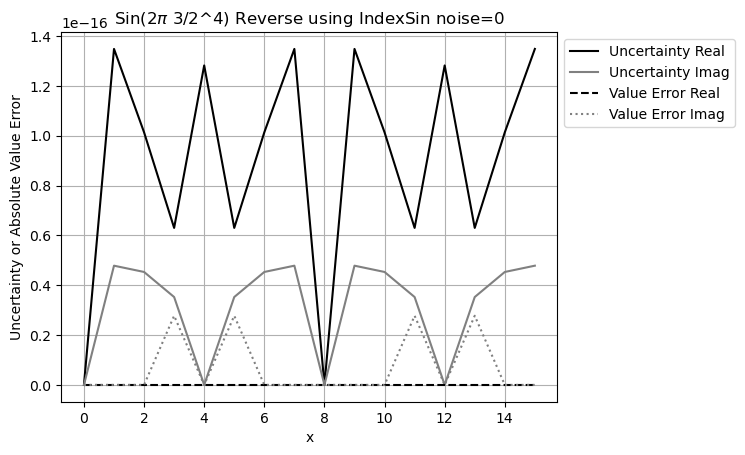

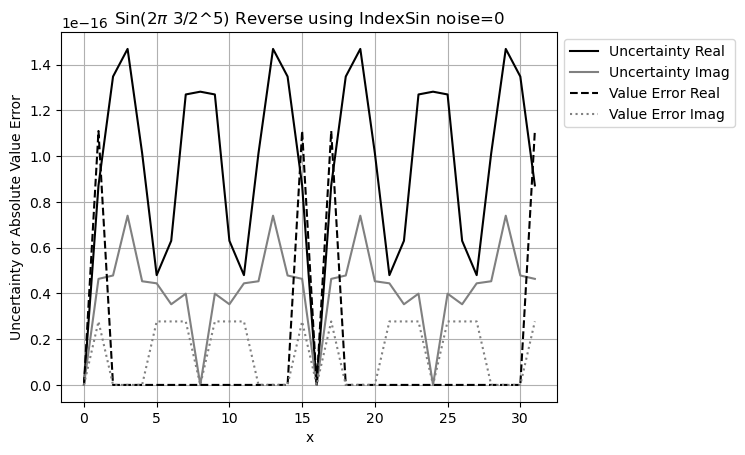

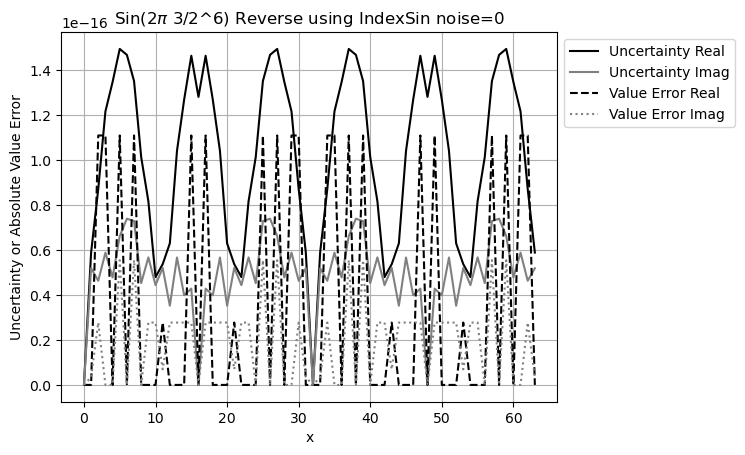

In [113]:
PlotSpectra('IndexSin', 4, 'Sin', 3, 'Reverse')
PlotSpectra('IndexSin', 5, 'Sin', 3, 'Reverse')
PlotSpectra('IndexSin', 6, 'Sin', 3, 'Reverse')

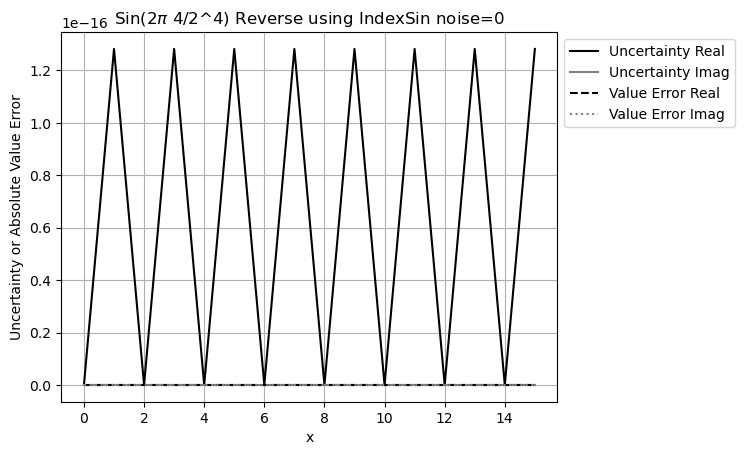

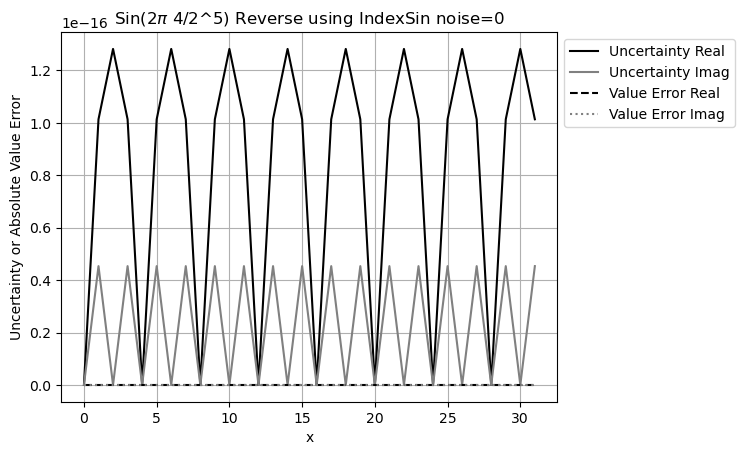

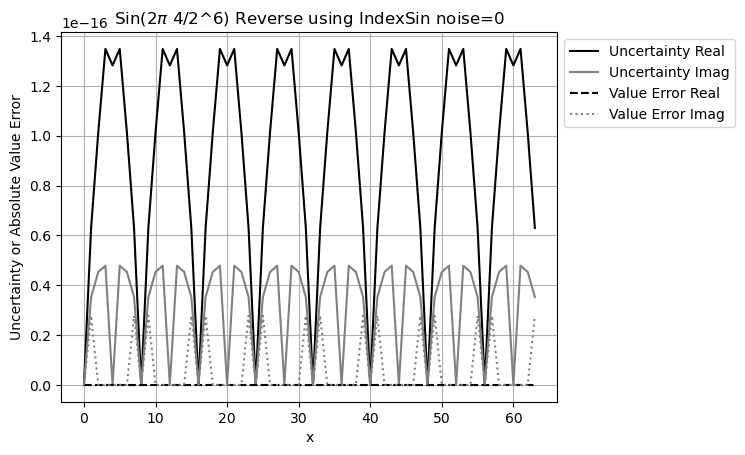

In [114]:
PlotSpectra('IndexSin', 4, 'Sin', 4, 'Reverse')
PlotSpectra('IndexSin', 5, 'Sin', 4, 'Reverse')
PlotSpectra('IndexSin', 6, 'Sin', 4, 'Reverse')

# Compare LibSin with SciPy

In [125]:
def Compare(order, freq, test, ylim=[]):
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel('Index')
    ax.set_ylabel('Error')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(f'sin(2$\pi$ {freq}/2^{order}): {test} using LibSin noise=0')
    
    dfPlot = df[(df['SinSource']=='LibSin') & (df['NoiseType']=='Gaussian') & (df['Noise']==0) &
                (df['Order']==order) & (df['Signal']=='Sin') & (df['Freq']==freq)]\
                .sort_values('Index')
    dfReal = dfPlot[dfPlot['Imag'] == 0]
    dfImag = dfPlot[dfPlot['Imag'] == 1]
    ax.plot(dfReal['Index'], dfReal[f'{test} Uncertainty'], 'k-', label=f'Uncertainty Real')
    ax.plot(dfImag['Index'], dfImag[f'{test} Uncertainty'], c='gray', ls='-', label=f'Uncertainty Imag')
    ax.plot(dfReal['Index'], np.abs(dfReal[f'{test} Error']), 'k--', label=f'Value Error Real')
    ax.plot(dfImag['Index'], np.abs(dfImag[f'{test} Error']), c='gray', ls=':', label=f'Value Error Imag')
    
    size = 1 << order
    if freq == size/4:
        sWave = [1 if (i%4) == 1 else -1 if (i%4) == 3 else 0 for i in range(0,size)]
    else:
        sWave = [math.sin(math.pi*2*freq *i/size) for i in range(0,size)]
    sFreq = [0] * size
    sFreq[freq] = -size *0.5j
    sFreq[size - freq] = +size *0.5j
    if test == 'Forward':
        sRes = sp.fft.fft(sWave, n=size)
        sError = sRes - sFreq
    elif test == 'Reverse':
        sRes = sp.fft.ifft(sFreq, n=size)
        sError = sRes - sWave
    elif test == 'Roundtrip':
        sRes = sp.fft.ifft( sp.fft.fft(sWave, n=size), n=size)
        sError = sRes - sWave
    else:
        raise ValueError(f'Invalid test={test}')
    sReal = np.array([c.real() if type(c) == complex else c for c in sError])
    sImag = np.array([c.real() if type(c) == complex else 0 for c in sError])
    ax.plot(range(len(sError)), np.abs(sReal), 'kx', label=f'SciPy Error Real')
    #ax.plot(range(len(sError)), np.abs(sImag), 'r+', label=f'SciPy Error Imag')

    ax.legend(bbox_to_anchor=(1.0, 1.0))


In [126]:
def CompareAllTest(order, freq):
    Compare(order, freq, 'Forward')
    Compare(order, freq, 'Reverse')
    Compare(order, freq, 'Roundtrip')

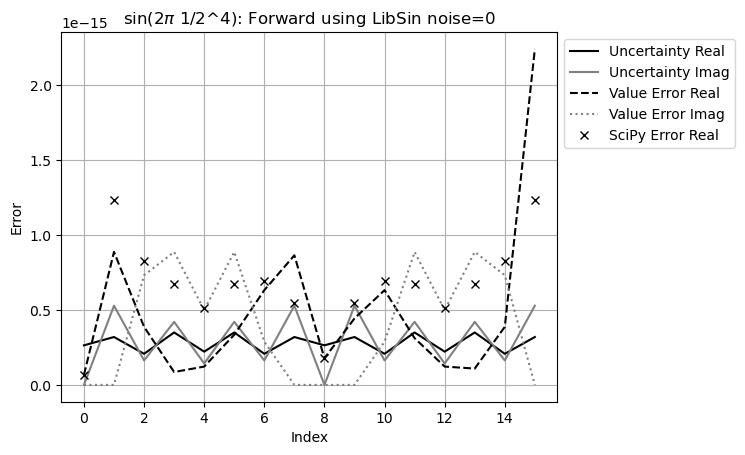

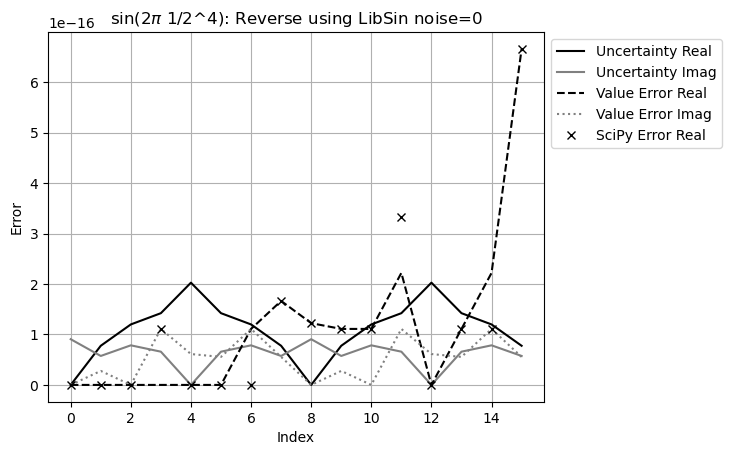

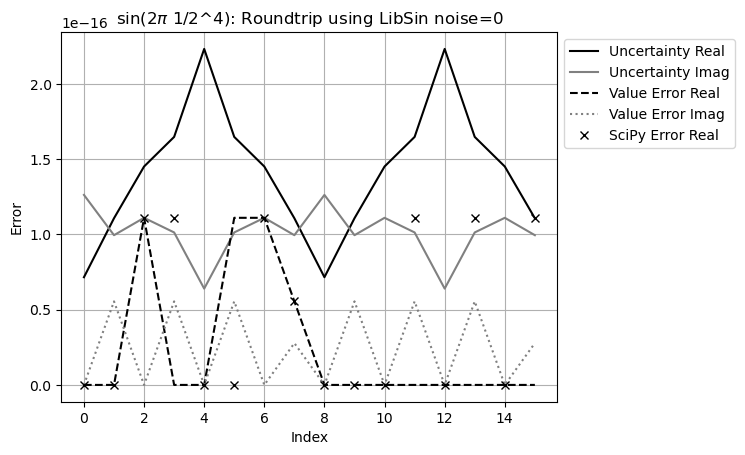

In [127]:
CompareAllTest(4,1)

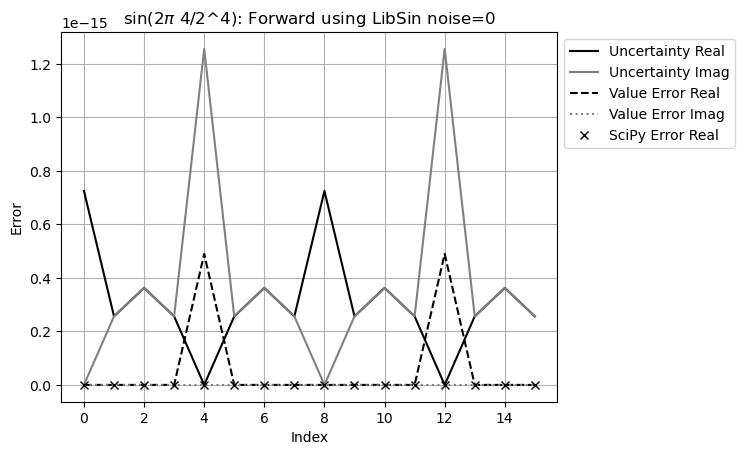

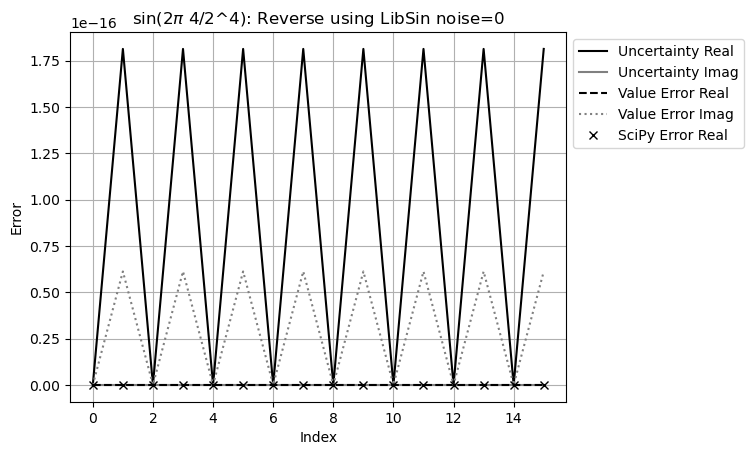

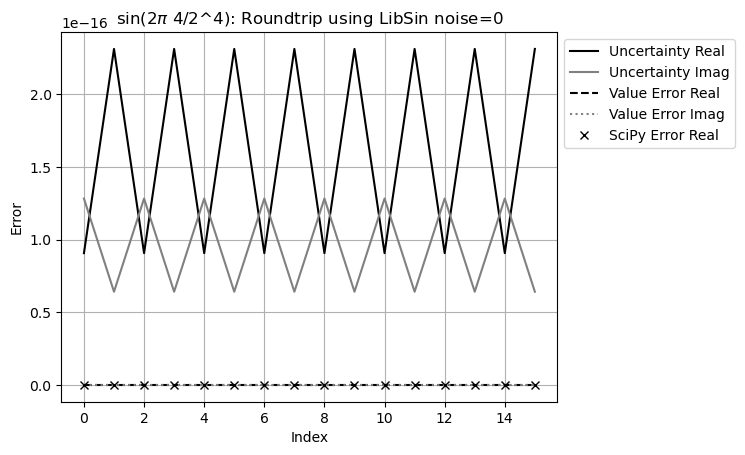

In [128]:
CompareAllTest(4,4)

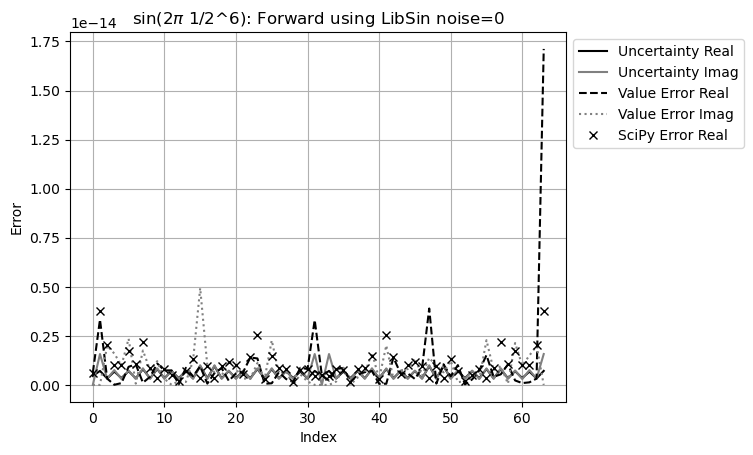

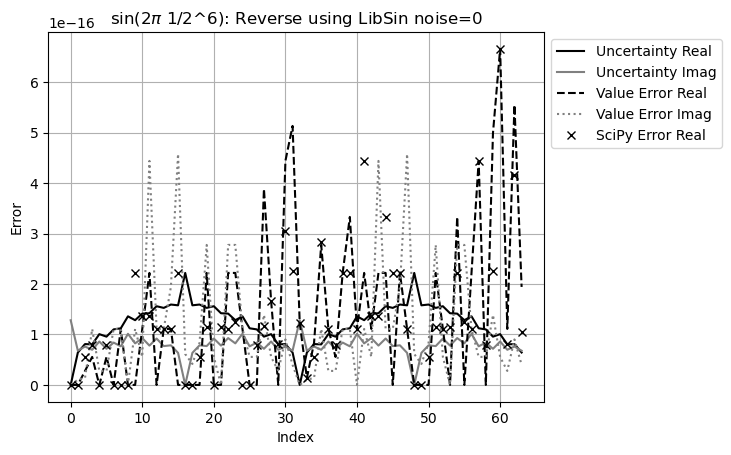

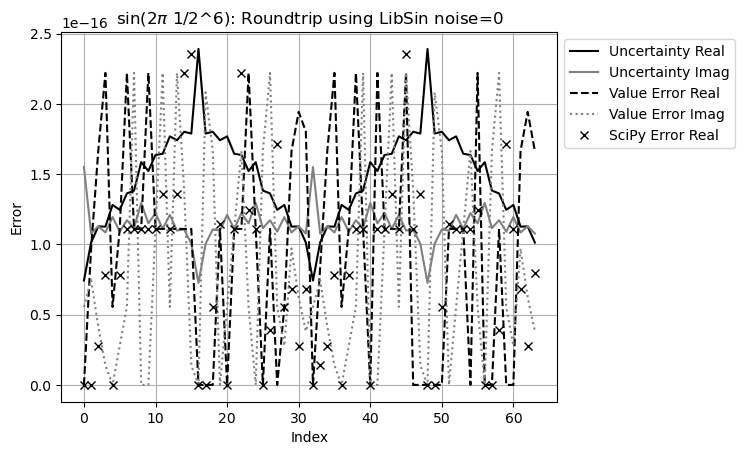

In [129]:
CompareAllTest(ORDER,1)

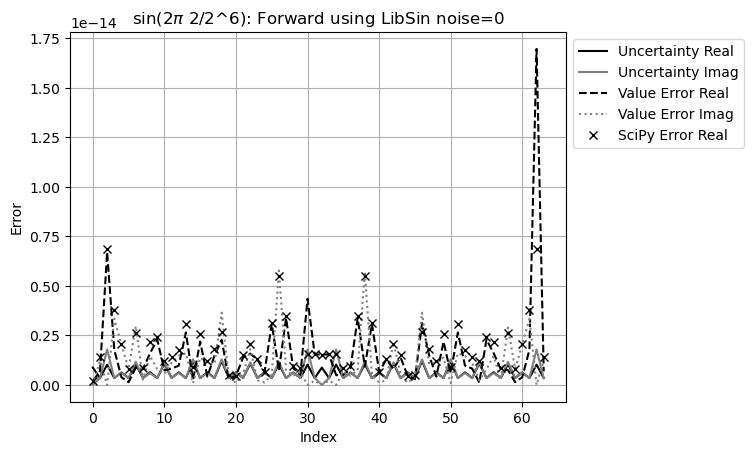

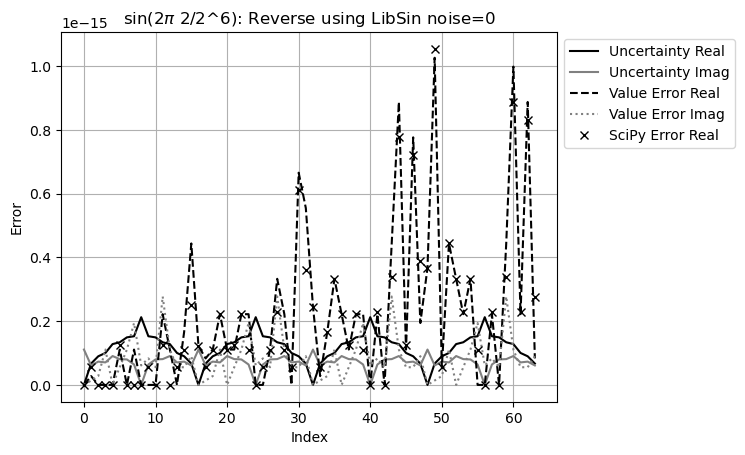

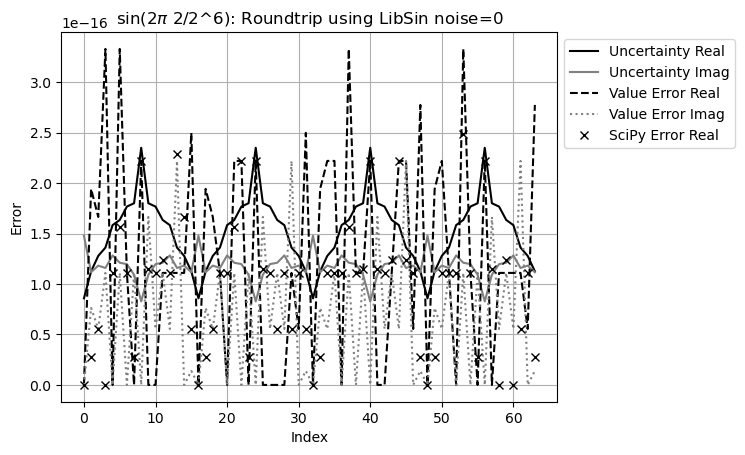

In [130]:
CompareAllTest(ORDER,2)

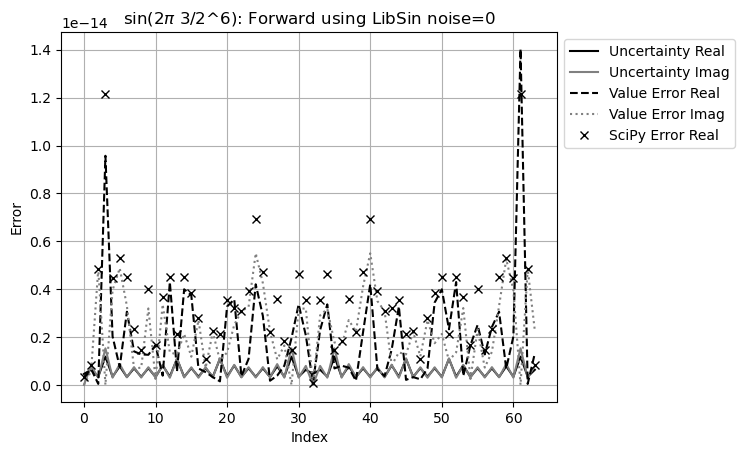

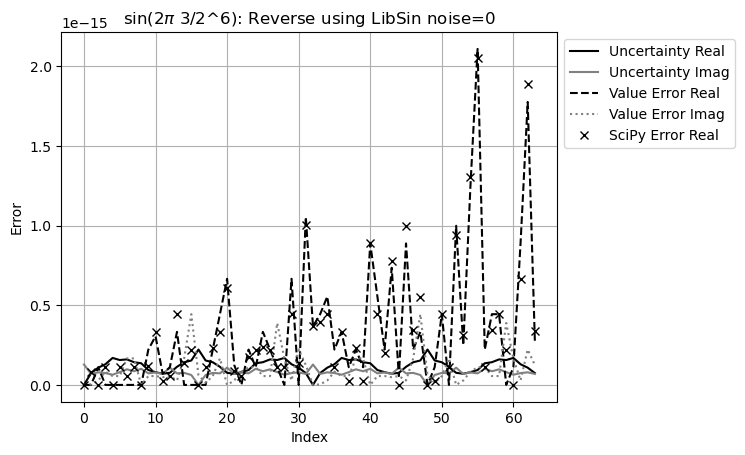

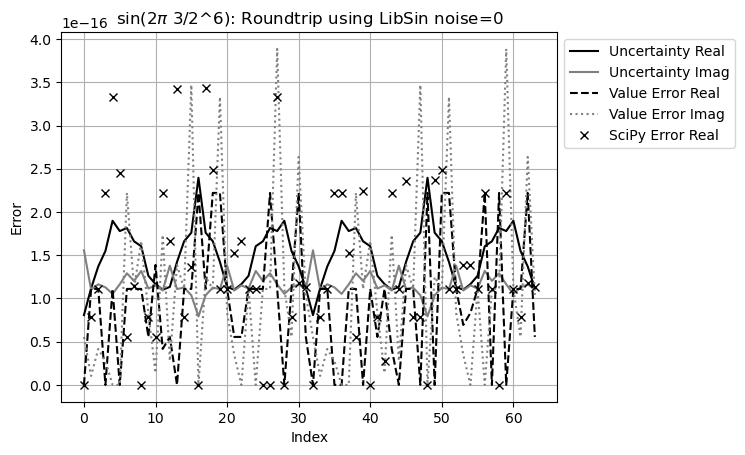

In [132]:
CompareAllTest(ORDER,3)

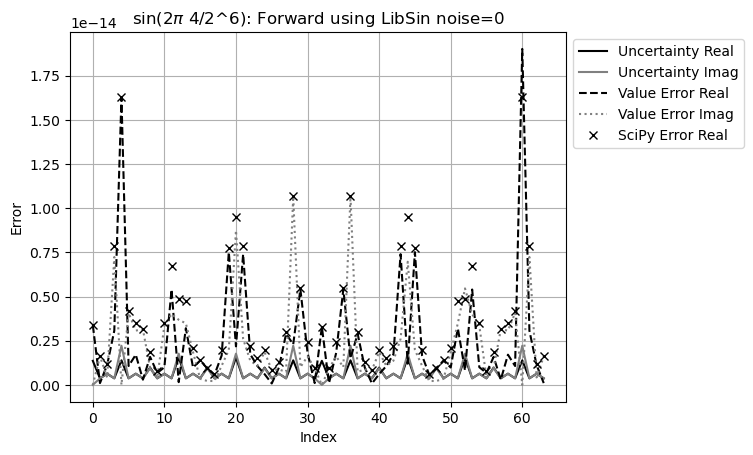

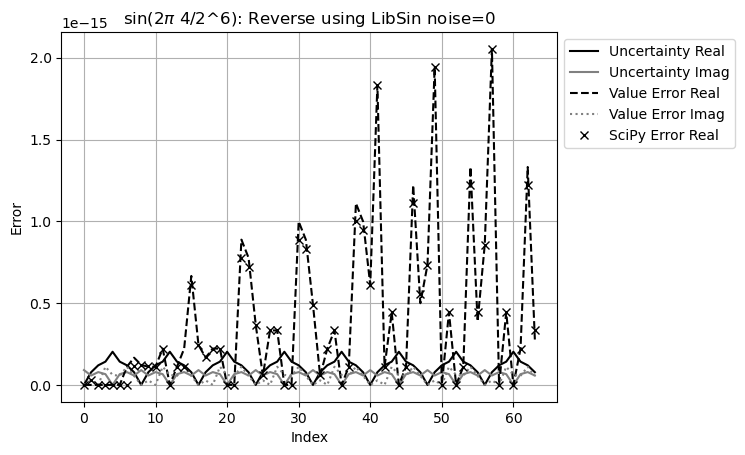

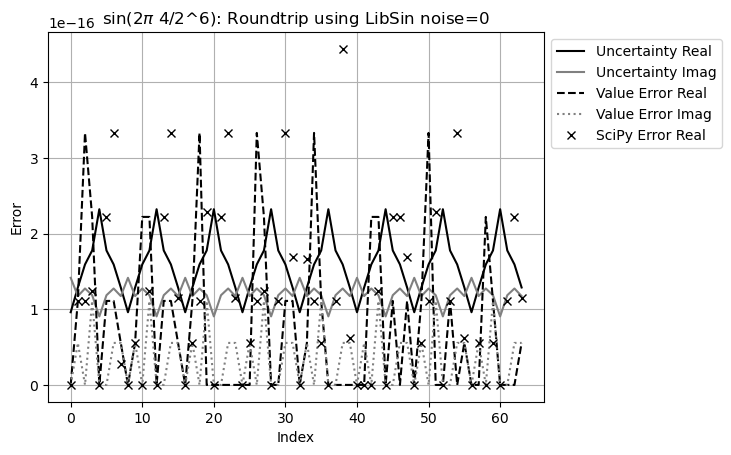

In [133]:
CompareAllTest(ORDER,4)

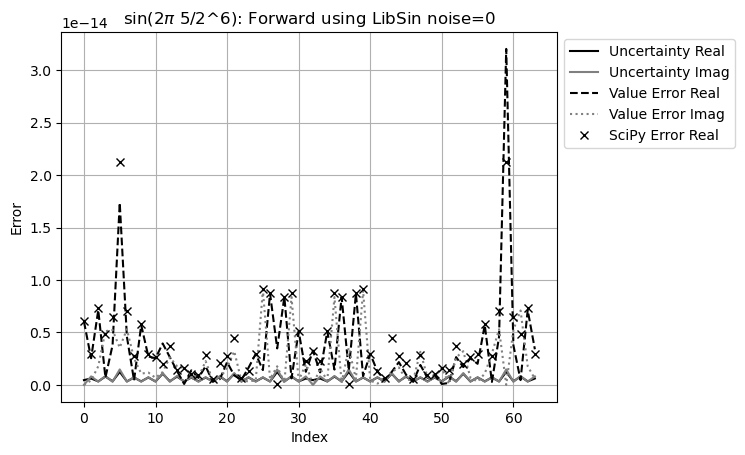

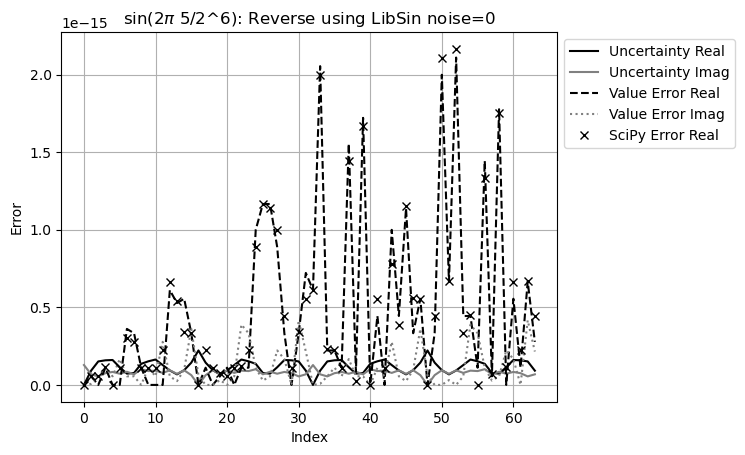

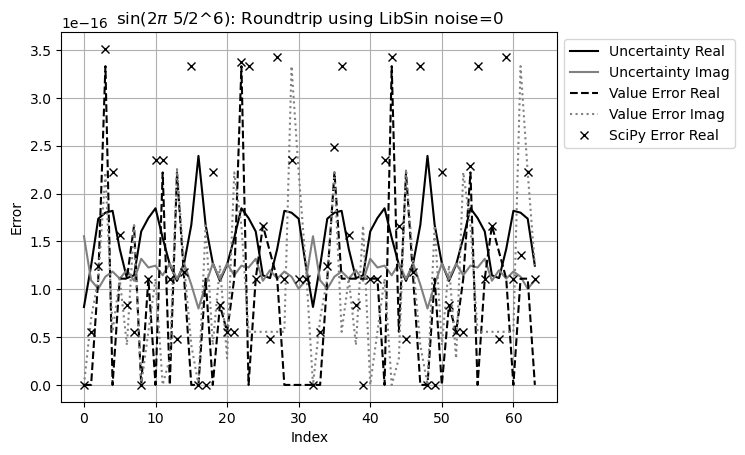

In [134]:
CompareAllTest(ORDER,5)

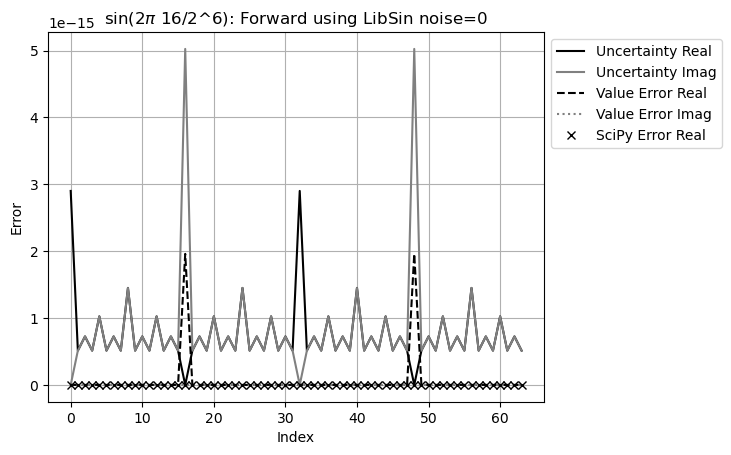

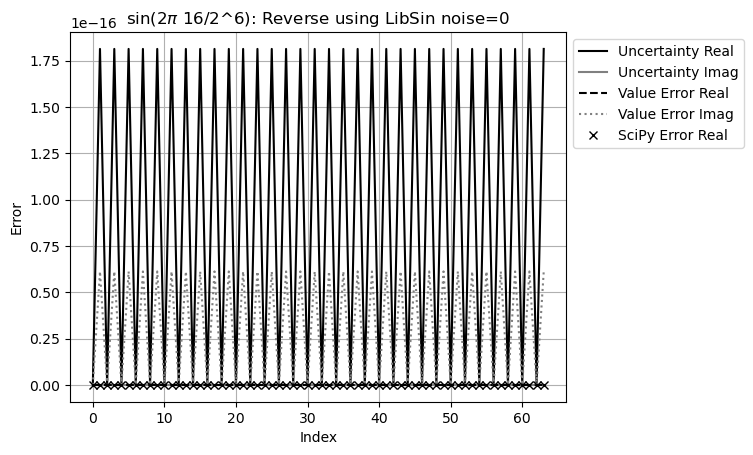

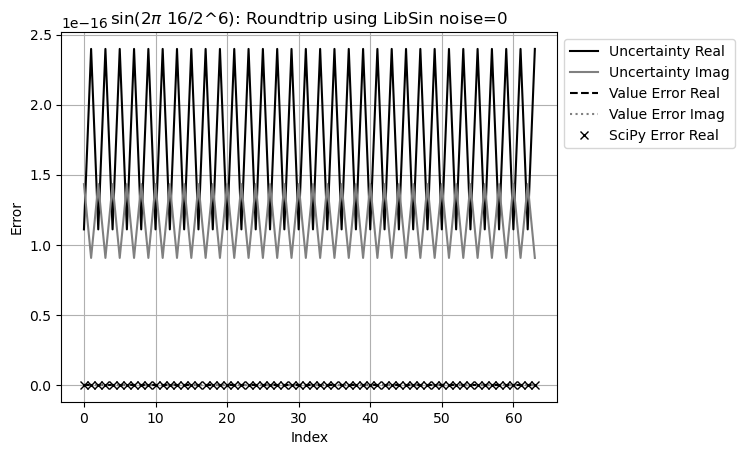

In [135]:
CompareAllTest(ORDER,16)